# Business Objective:
### This is a classification project since the variable to be predicted is binary (churn or loyal customer). The goal here is to model churn probability, conditioned on the customer features.

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


## Load the data

In [2]:
# read_csv file
data=pd.read_csv(r"C:\Users\hp\Downloads\Churn.csv").dropna()

In [3]:
data

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [4]:
##viewing the first 5 top rows to look the glimpse on data
data.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [5]:
##viewing the bottom 5 rows 
data.tail()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no
4999,5000,VT,area_code_415,86,yes,34,no,9.3,16,2.51,...,102,22,267.1,104,22.70,154.8,100,6.97,0,no


# EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [7]:
data.describe()

,Unnamed: 0,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,100.25860,7.755200,10.261780,4.435200,2.771196,180.288900,100.029400,100.191000,17.054322,200.391620,99.919200,9.017732,1.570400
std,1443.520003,39.69456,13.546393,2.761396,2.456788,0.745514,53.894699,19.831197,19.826496,4.296843,50.527789,19.958686,2.273763,1.306363
min,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,73.00000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,87.000000,14.140000,166.900000,87.000000,7.510000,1.000000
50%,2500.500000,100.00000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,3750.250000,127.00000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,114.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,5000.000000,243.00000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [8]:
data.shape

(5000, 21)

In [9]:
data.columns

Index(['Unnamed: 0', 'state', 'area.code', 'account.length', 'voice.plan',
       'voice.messages', 'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge',
       'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls', 'churn'],
      dtype='object')

In [10]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [11]:
data.duplicated().value_counts()

False    5000
dtype: int64

In [12]:
data.dtypes

Unnamed: 0          int64
state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [13]:
## dropping unwanted columns
data.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
data['area.code'].value_counts()

area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: area.code, dtype: int64

In [15]:
# here we have to change the data types object to float
data['day.charge'] = data['day.charge'].astype(float)
data['eve.mins'] = data['eve.mins'].astype(float)


In [16]:
##checking if any columns has missing values
data.isnull().sum()

state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

<AxesSubplot:>

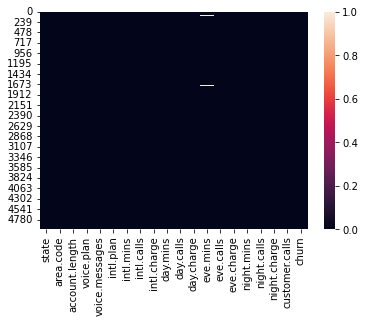

In [17]:
sns.heatmap(data.isnull())

In [18]:
data['day.charge']=data['day.charge'].fillna(data['day.charge'].mean())
data['eve.mins']=data['eve.mins'].fillna(data['eve.mins'].mean())

In [19]:
data.dtypes

state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge        float64
eve.mins          float64
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [20]:
data

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no
4998,DC,area_code_510,109,no,0,no,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0,no


In [21]:
data['state'].value_counts()

WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
NJ    112
UT    112
WI    106
MI    103
ME    103
MA    103
MD    102
VT    101
MT     99
RI     99
KY     99
MS     99
CT     99
KS     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
NC     91
SC     91
FL     90
NV     90
OK     90
TN     89
AZ     89
DC     88
IL     88
NE     88
ND     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: state, dtype: int64

In [22]:
data['area.code'].value_counts()

area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: area.code, dtype: int64

In [23]:
#label Encoding
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'churn'
data['churn']= label_encoder.fit_transform(data['churn']) 

In [24]:
# labeling the remaining columns 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
ohe_v = pd.DataFrame(ohe.fit_transform(data[['voice.plan']]),columns=['voice.plan1','voice.plan2'])
ohe_intl = pd.DataFrame(ohe.fit_transform(data[['intl.plan']]),columns=['intl.plan1','intl.plan2'])
ohe_area = pd.DataFrame(ohe.fit_transform(data[['area.code']]),columns=['area_code_415','area_code_408','area_code_510'])

In [25]:
ohe_v

,voice.plan1,voice.plan2
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
4995,0.0,1.0
4996,1.0,0.0
4997,1.0,0.0
4998,1.0,0.0


In [26]:
ohe_area

,area_code_415,area_code_408,area_code_510
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4995,1.0,0.0,0.0
4996,0.0,1.0,0.0
4997,0.0,1.0,0.0
4998,0.0,0.0,1.0


In [27]:
data_1=pd.concat((data,ohe_v,ohe_intl,ohe_area),axis=1,join='inner').drop(['voice.plan','intl.plan','area.code'],axis=1)
data_1


,state,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,...,night.charge,customer.calls,churn,voice.plan1,voice.plan2,intl.plan1,intl.plan2,area_code_415,area_code_408,area_code_510
0,KS,128,25,10.0,3,2.70,265.1,110,45.07,197.4,...,11.01,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,OH,107,26,13.7,3,3.70,161.6,123,27.47,195.5,...,11.45,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,NJ,137,0,12.2,5,3.29,243.4,114,41.38,121.2,...,7.32,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,OH,84,0,6.6,7,1.78,299.4,71,50.90,61.9,...,8.86,2,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,OK,75,0,10.1,3,2.73,166.7,113,28.34,148.3,...,8.41,3,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,40,9.9,5,2.67,235.7,127,40.07,223.0,...,13.39,2,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4996,WV,152,0,14.7,2,3.97,184.2,90,31.31,256.8,...,9.61,3,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4997,DC,61,0,13.6,4,3.67,140.6,89,23.90,172.8,...,9.56,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4998,DC,109,0,8.5,6,2.30,188.8,67,32.10,171.7,...,10.10,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [28]:
data_1.drop('state',axis=1,inplace=True)

In [29]:
data_1

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,...,night.charge,customer.calls,churn,voice.plan1,voice.plan2,intl.plan1,intl.plan2,area_code_415,area_code_408,area_code_510
0,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,...,11.01,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,...,11.45,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,...,7.32,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,...,8.86,2,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,...,8.41,3,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,...,13.39,2,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4996,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,...,9.61,3,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4997,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,...,9.56,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4998,109,0,8.5,6,2.30,188.8,67,32.10,171.7,92,...,10.10,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [30]:
data['churn'].value_counts()

0    4293
1     707
Name: churn, dtype: int64

In [31]:
data_1.isnull().sum()

account.length    0
voice.messages    0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
voice.plan1       0
voice.plan2       0
intl.plan1        0
intl.plan2        0
area_code_415     0
area_code_408     0
area_code_510     0
dtype: int64

# Visualization

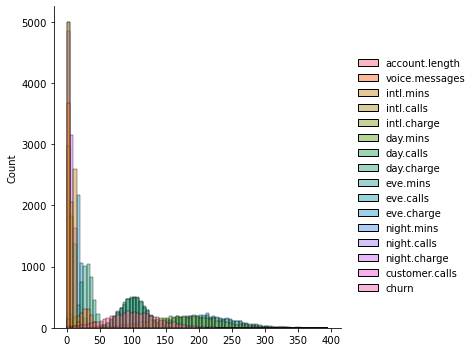

In [32]:
sns.displot(data=data)

array([[<AxesSubplot:title={'center':'account.length'}>,
        <AxesSubplot:title={'center':'voice.messages'}>,
        <AxesSubplot:title={'center':'intl.mins'}>,
        <AxesSubplot:title={'center':'intl.calls'}>],
       [<AxesSubplot:title={'center':'intl.charge'}>,
        <AxesSubplot:title={'center':'day.mins'}>,
        <AxesSubplot:title={'center':'day.calls'}>,
        <AxesSubplot:title={'center':'day.charge'}>],
       [<AxesSubplot:title={'center':'eve.mins'}>,
        <AxesSubplot:title={'center':'eve.calls'}>,
        <AxesSubplot:title={'center':'eve.charge'}>,
        <AxesSubplot:title={'center':'night.mins'}>],
       [<AxesSubplot:title={'center':'night.calls'}>,
        <AxesSubplot:title={'center':'night.charge'}>,
        <AxesSubplot:title={'center':'customer.calls'}>,
        <AxesSubplot:title={'center':'churn'}>]], dtype=object)

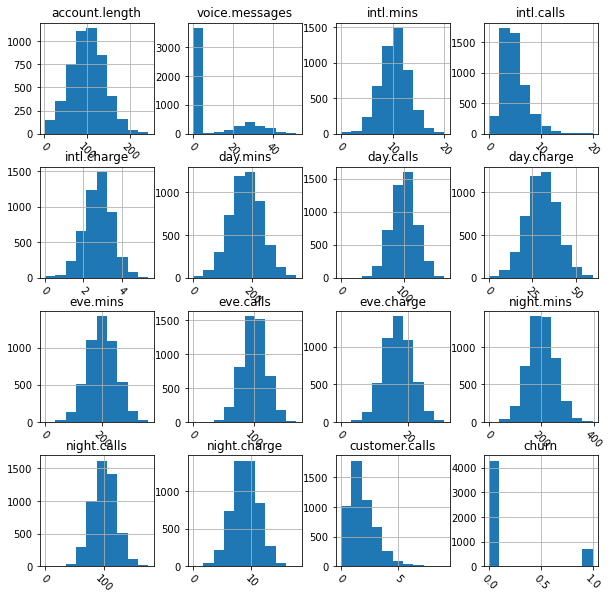

In [33]:
data.hist(figsize=(10,10),xrot=-45)

### Vizualization for churn column

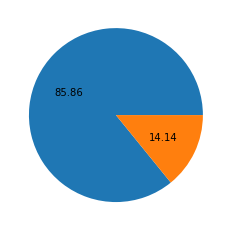

In [34]:
#imbalance Dataset
plt.pie(data['churn'].value_counts(),autopct='%.2f')
plt.show()

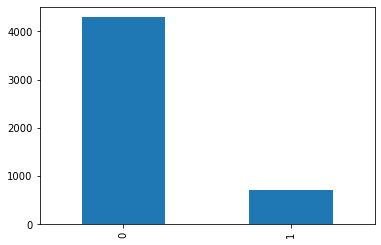

In [35]:
#barplot
value_counts = ['No','Yes']
data['churn'].value_counts().plot.bar()
plt.show()

######  After analyzing the churn column, we had to say 14% of customers have churned. 

In [36]:
# Analyzing state column
data['state'].nunique()

51

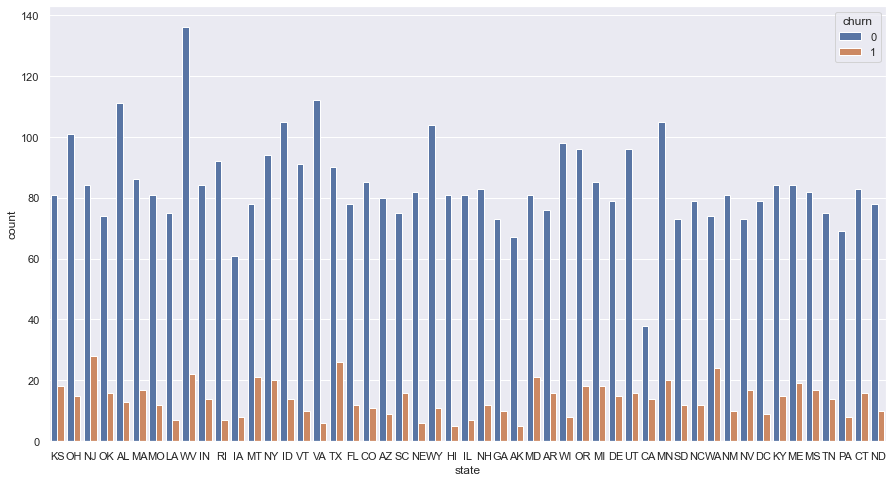

In [37]:
#comparing state & churn column using countplot
sns.set(style = "darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x = 'state', hue='churn',data=data)
plt.show()

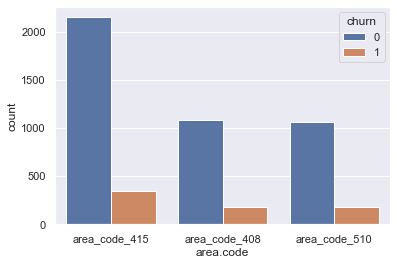

In [38]:
#comparing area code & churn column using countplot
sns.set(style = "darkgrid")
ax = sns.countplot(x ='area.code', hue="churn",data=data)
plt.show()

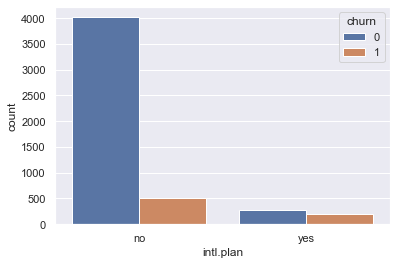

In [39]:
# analysis on international plan
sns.set(style = "darkgrid")
ax = sns.countplot(x ='intl.plan', hue="churn",data=data)
plt.show()

In [40]:
data['intl.plan'].value_counts()

no     4527
yes     473
Name: intl.plan, dtype: int64

###### From the above data we get There are 4527 customers who dont have a international plan. There are 473 customers who have a international plan. Among those who have a international plan 42.4 % people churn. Whereas among those who dont have a international plan only 11.4 % people churn. So basically the people who bought International plans are churning in big numbers. Probably because of connectivity issues or high call charge.



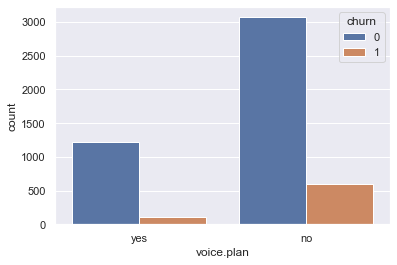

In [41]:
# analysis on voice plan column
sns.set(style = "darkgrid")
ax = sns.countplot(x ='voice.plan', hue="churn",data=data)
plt.show()

In [42]:
data['voice.plan'].value_counts()

no     3677
yes    1323
Name: voice.plan, dtype: int64

##### As we can see there is are no clear relation between voice mail plan and churn so we can't clearly say anything so let's move to the next voice mail feature i.e number of voice mail, let's see what it gives to us.

<AxesSubplot:xlabel='customer.calls', ylabel='count'>

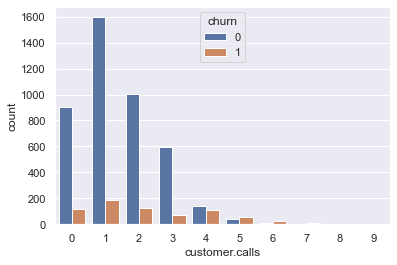

In [43]:
#Analysing using countplot
sns.countplot(x='customer.calls',hue="churn",data = data)

##### The above data shows that customer car services are not good at attending the queries of the customer, & also customer who had called more than 5 times . Hence they need to improve their services

<AxesSubplot:>

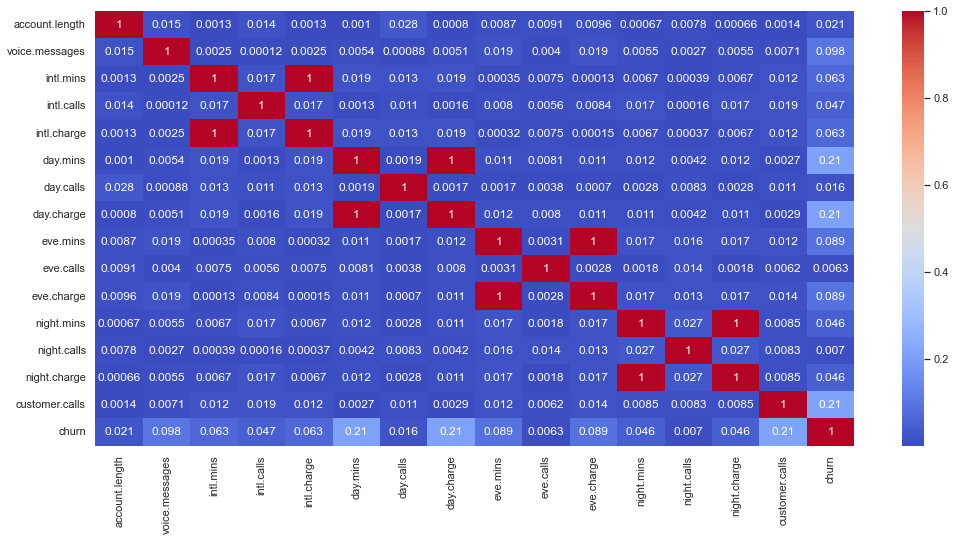

In [44]:
# plotting the corelation matrix

plt.figure(figsize=(17,8))
correlation=data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## To detect the outliers by using Boxplot

<AxesSubplot:>

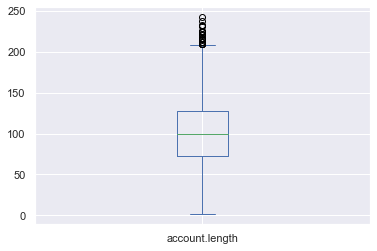

In [45]:
data_1["account.length"].plot(kind="box")

<AxesSubplot:>

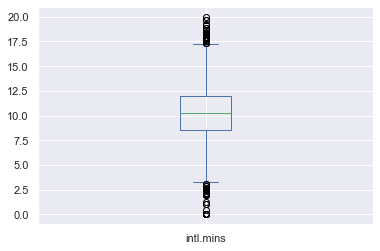

In [46]:
data_1["intl.mins"].plot(kind="box")

<AxesSubplot:>

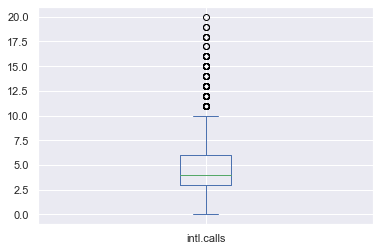

In [47]:
data_1["intl.calls"].plot(kind="box")

## Finding the IQR

In [48]:
percentile25 = data_1['intl.mins'].quantile(0.25)
percentile75 = data_1['intl.mins'].quantile(0.75)

In [49]:
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  12.0
25th quartile:  8.5


In [50]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  3.5


##  Finding upper and lower limit

In [51]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

##  Finding Outliers

In [52]:
data_1[data_1['intl.mins'] > upper_limit]
data_1[data_1['intl.mins'] < lower_limit]

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,...,night.charge,customer.calls,churn,voice.plan1,voice.plan2,intl.plan1,intl.plan2,area_code_415,area_code_408,area_code_510
179,70,0,0.0,0,0.00,232.1,122,39.46,292.300000,112,...,9.05,3,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
225,65,0,2.7,4,0.73,213.4,111,36.28,234.500000,94,...,11.25,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
343,98,21,0.0,0,0.00,64.6,98,10.98,176.100000,86,...,11.02,2,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
397,94,0,2.0,2,0.54,234.4,103,39.85,279.300000,109,...,10.54,1,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0
488,165,0,0.0,0,0.00,242.9,126,41.29,209.800000,65,...,10.28,1,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
595,87,28,0.0,0,0.00,151.4,95,25.74,152.400000,97,...,11.25,1,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
712,106,0,0.0,0,0.00,114.4,104,19.45,78.300000,101,...,10.47,2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
762,161,0,1.3,6,0.35,189.6,78,32.23,267.400000,117,...,8.30,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
878,62,0,0.0,0,0.00,281.0,66,47.77,160.600000,108,...,3.51,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1028,70,0,0.0,0,0.00,222.8,114,37.88,215.900000,113,...,10.06,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## Trimming

In [53]:
new_data = data_1[data_1['intl.mins'] < upper_limit]
new_data.shape

(4971, 23)

##  Compare the plots after trimming

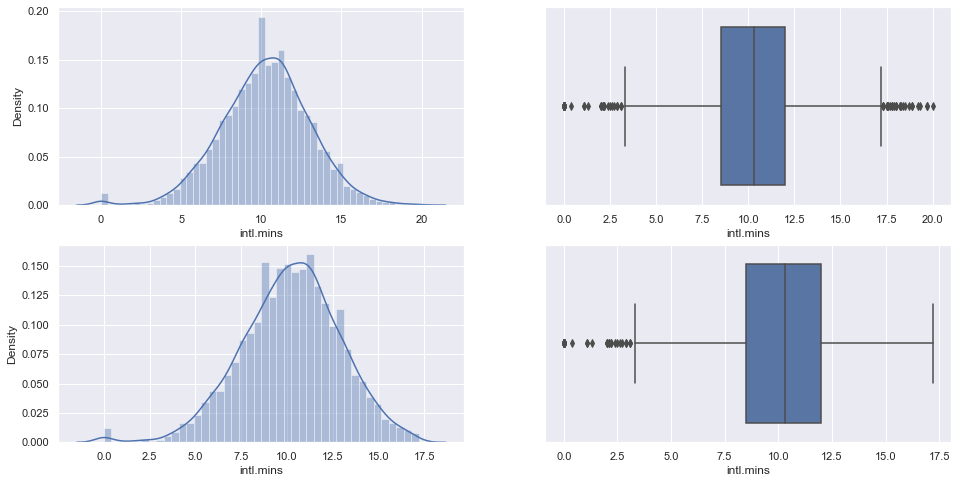

In [54]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_1['intl.mins'])
plt.subplot(2,2,2)
sns.boxplot(data_1['intl.mins'])
plt.subplot(2,2,3)
sns.distplot(new_data['intl.mins'])
plt.subplot(2,2,4)
sns.boxplot(new_data['intl.mins'])
plt.show()

## Capping

In [55]:
new_df_cap = data_1.copy()
new_df_cap['intl.mins'] = np.where(
    new_df_cap['intl.mins'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['intl.mins'] < lower_limit,
        lower_limit,
        new_df_cap['intl.mins']
    )
)

## Compare the plots after capping

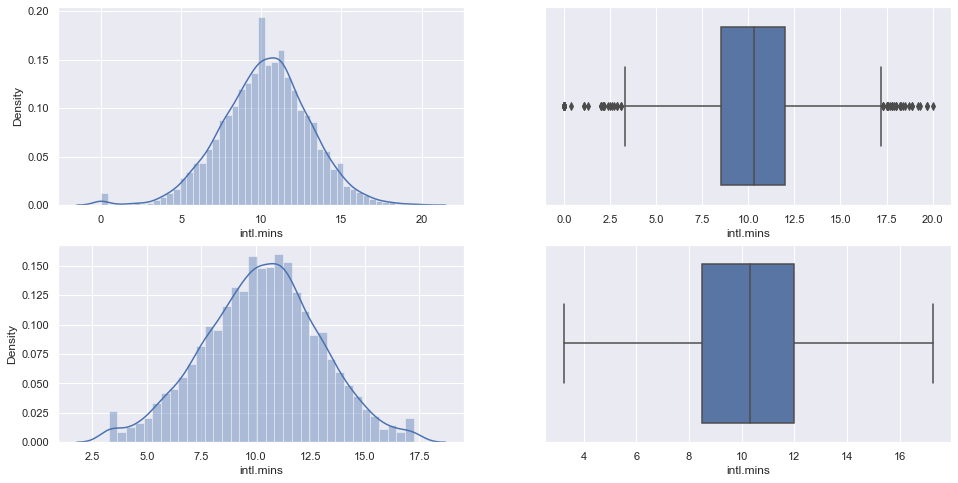

In [56]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_1['intl.mins'])
plt.subplot(2,2,2)
sns.boxplot(data_1['intl.mins'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['intl.mins'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['intl.mins'])
plt.show()

In [57]:
!pip install pandas-profiling==3.1.0

  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.2.0 requires joblib>=1.1.1, but you have joblib 1.0.1 which is incompatible.
ppscore 1.2.0 requires scikit-learn<1.0.0,>=0.20.2, but you have scikit-learn 1.2.0 which is incompatible.
imbalanced-learn 0.10.0 requires joblib>=1.1.1, but you have joblib 1.0.1 which is incompatible.


In [58]:
!pip install sweetviz

In [59]:
import pandas_profiling as pp
import sweetviz as sv

In [60]:
sweet = sv.analyze(data)
sweet.show_html('Sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Feature Engineering

## Split the data into independent feature and   dependent target

In [61]:
X=new_df_cap.drop('churn',axis=1)

y=new_df_cap[['churn']]


In [62]:
new_df_cap

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,...,night.charge,customer.calls,churn,voice.plan1,voice.plan2,intl.plan1,intl.plan2,area_code_415,area_code_408,area_code_510
0,128,25,10.0,3,2.70,265.1,110,45.07,197.4,99,...,11.01,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,107,26,13.7,3,3.70,161.6,123,27.47,195.5,103,...,11.45,1,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,137,0,12.2,5,3.29,243.4,114,41.38,121.2,110,...,7.32,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,84,0,6.6,7,1.78,299.4,71,50.90,61.9,88,...,8.86,2,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,75,0,10.1,3,2.73,166.7,113,28.34,148.3,122,...,8.41,3,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,40,9.9,5,2.67,235.7,127,40.07,223.0,126,...,13.39,2,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4996,152,0,14.7,2,3.97,184.2,90,31.31,256.8,73,...,9.61,3,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4997,61,0,13.6,4,3.67,140.6,89,23.90,172.8,128,...,9.56,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4998,109,0,8.5,6,2.30,188.8,67,32.10,171.7,92,...,10.10,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [63]:
# split the data into train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=104)



In [64]:
new_df_cap.churn.value_counts()

0    4293
1     707
Name: churn, dtype: int64

In [65]:
!pip install imblearn

  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ppscore 1.2.0 requires scikit-learn<1.0.0,>=0.20.2, but you have scikit-learn 1.2.0 which is incompatible.
pandas-profiling 3.1.0 requires joblib~=1.0.1, but you have joblib 1.2.0 which is incompatible.


## Checking the data was balanced or not¶


In [66]:
new_df_cap["churn"].value_counts()

0    4293
1     707
Name: churn, dtype: int64

In [67]:
measurity=new_df_cap[new_df_cap["churn"]==1]
minority=new_df_cap[new_df_cap["churn"]==0]

In [68]:
print(measurity.shape,minority.shape)# here is data not balanced

(707, 23) (4293, 23)


### Here we have to handle imbalanced data by using over sampling

# Random OverSampler

In [69]:
from imblearn.over_sampling import RandomOverSampler

In [70]:
res=RandomOverSampler(random_state=0)
x_res,y_res=res.fit_resample(x_train,y_train)

#### now our data is balanced

In [71]:
x_res.shape,y_res.shape  

((6868, 22), (6868, 1))

In [72]:
# building model 
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_res, y_res)

LogisticRegression(random_state=0)

In [73]:
y_test_pred=classifier.predict(x_test)

In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#print classification report for model
print(classification_report(y_test, y_test_pred))
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)
cf_matrix=confusion_matrix(y_test_pred,y_test)
cf_matrix

              precision    recall  f1-score   support

           0       0.94      0.72      0.81       859
           1       0.29      0.72      0.42       141

    accuracy                           0.72      1000
   macro avg       0.62      0.72      0.62      1000
weighted avg       0.85      0.72      0.76      1000

accuracy_score :  0.717
precision_score :  0.2947976878612717
recall_score :  0.723404255319149
f1_score :  0.4188911704312115


array([[615,  39],
       [244, 102]], dtype=int64)

# SMOTE

In [75]:
# here we are using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

In [76]:
x_train_res.shape,y_train_res.shape


((6868, 22), (6868, 1))

In [77]:
# building model 
#Fitting Logistic Regression to the training set 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train_res, y_train_res)
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)
cf_matrix=confusion_matrix(y_test_pred,y_test)
cf_matrix

accuracy_score :  0.717
precision_score :  0.2947976878612717
recall_score :  0.723404255319149
f1_score :  0.4188911704312115


array([[615,  39],
       [244, 102]], dtype=int64)

In [78]:
y_test_pred=classifier.predict(x_test)

In [79]:
from sklearn.metrics import classification_report

#print classification report for model
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       859
           1       0.30      0.76      0.43       141

    accuracy                           0.71      1000
   macro avg       0.62      0.73      0.62      1000
weighted avg       0.86      0.71      0.75      1000



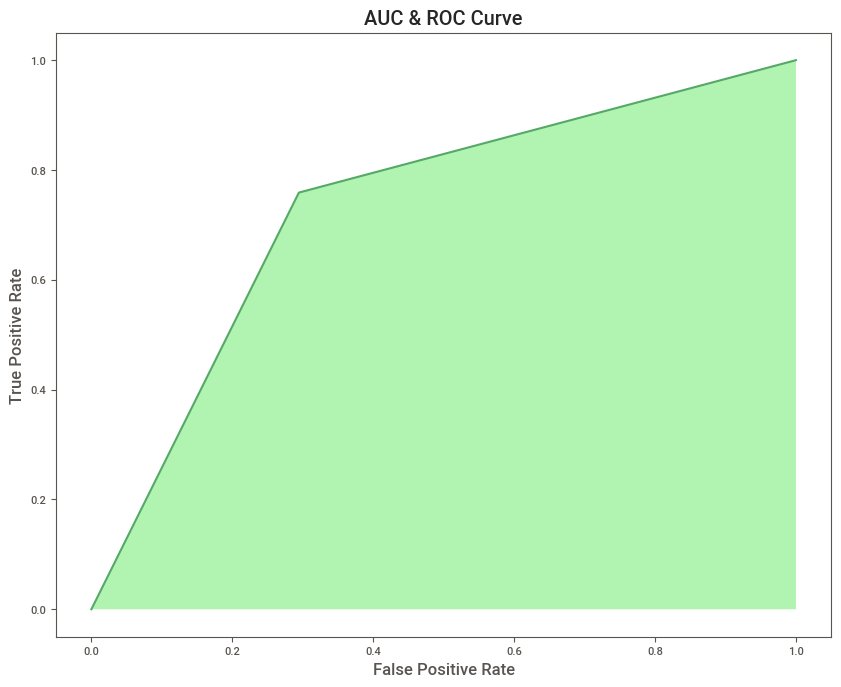

In [80]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_test_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_test_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

rdf=RandomForestClassifier(n_estimators=10,max_features=3,criterion="entropy") ## Create Random forest classifer object

model_1=rdf.fit(x_res,y_res)


In [82]:

#Predict the response for test dataset
y_predict = rdf.predict(x_test)

In [83]:
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [85]:
from sklearn.metrics import classification_report

#print classification report for model
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       859
           1       0.88      0.68      0.77       141

    accuracy                           0.94      1000
   macro avg       0.92      0.83      0.87      1000
weighted avg       0.94      0.94      0.94      1000



In [87]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test,y_predict)
precision = precision_score(y_test,y_predict)
recall = recall_score(y_test,y_predict)
f1 = f1_score(y_test, y_predict)
print("accuracy_score : ", accuracy)
print("precision_score : ", prec)
print("recall_score : ", recall)
print("f1_score : ", f1)

accuracy_score :  0.942
precision_score :  0.2947976878612717
recall_score :  0.6808510638297872
f1_score :  0.7679999999999999


In [88]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_predict,y_test)
cf_matrix

array([[846,  45],
       [ 13,  96]], dtype=int64)

# SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', random_state = 0,gamma=0.1)
clf.fit(x_res,y_res)

In [ ]:
pred=clf.predict(x_test)